# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#from config import api_keys
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url)
weather_json = city_weather.json()
weather_json

{'coord': {'lon': -68.5145, 'lat': 63.7506},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 260.76,
  'feels_like': 253.76,
  'temp_min': 260.76,
  'temp_max': 260.76,
  'pressure': 1021,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 4.02, 'deg': 320},
 'clouds': {'all': 75},
 'dt': 1701785267,
 'sys': {'type': 2,
  'id': 47658,
  'country': 'CA',
  'sunrise': 1701784599,
  'sunset': 1701802372},
 'timezone': -18000,
 'id': 5983720,
 'name': 'Iqaluit',
 'cod': 200}

In [6]:
requests.get(city_url)
weather_json["coord"]["lat"]

63.7506

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | puerto armuelles
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | pariaman
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | rolla
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | isafjordu

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,299.32,80,89,4.20,MU,1701785385
1,ancud,-41.8697,-73.8203,287.48,73,1,2.21,CL,1701785343
2,puerto armuelles,8.2833,-82.8667,302.13,68,0,1.34,PA,1701785221
3,margaret river,-33.9500,115.0667,288.25,79,50,6.94,AU,1701785007
4,keflavik,64.0049,-22.5624,275.39,75,40,7.72,IS,1701785387


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,299.32,80,89,4.20,MU,1701785385
1,ancud,-41.8697,-73.8203,287.48,73,1,2.21,CL,1701785343
2,puerto armuelles,8.2833,-82.8667,302.13,68,0,1.34,PA,1701785221
3,margaret river,-33.9500,115.0667,288.25,79,50,6.94,AU,1701785007
4,keflavik,64.0049,-22.5624,275.39,75,40,7.72,IS,1701785387


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

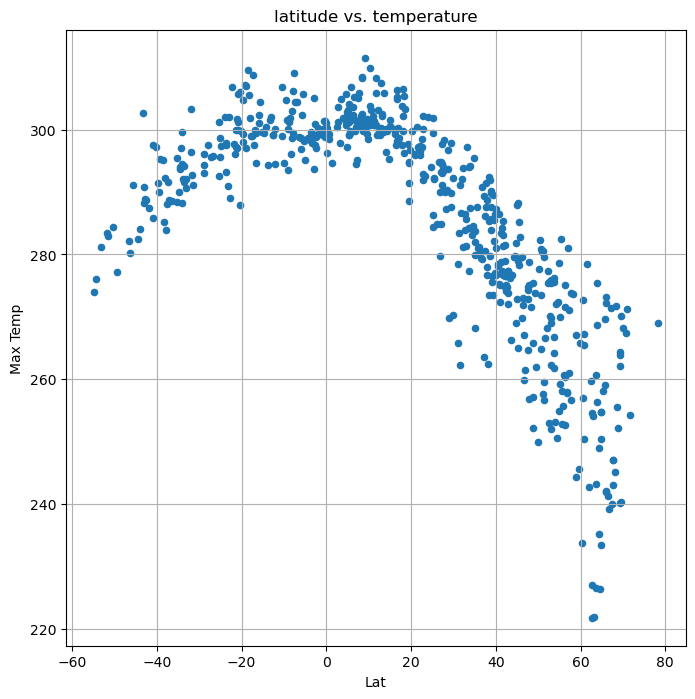

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="latitude vs. temperature")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

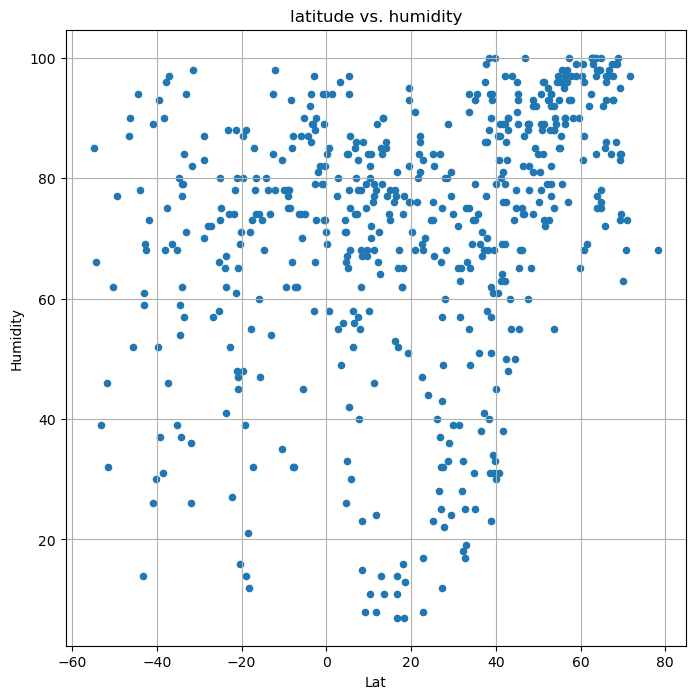

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="latitude vs. humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

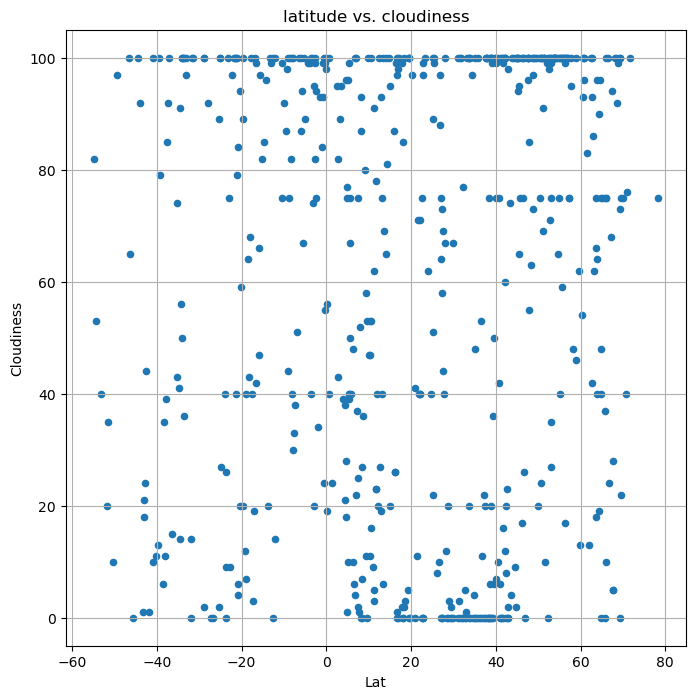

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="latitude vs. cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

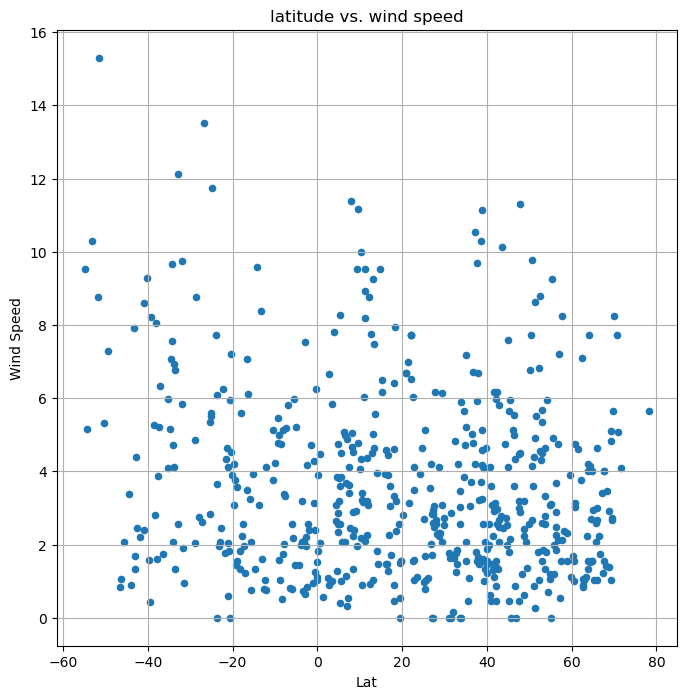

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="latitude vs. wind speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto armuelles,8.2833,-82.8667,302.13,68,0,1.34,PA,1701785221
4,keflavik,64.0049,-22.5624,275.39,75,40,7.72,IS,1701785387
6,tiksi,71.6872,128.8694,254.22,97,100,4.09,RU,1701785269
9,tura,25.5198,90.2201,292.15,67,99,1.02,IN,1701785024
10,yellowknife,62.4560,-114.3525,259.74,94,100,7.10,CA,1701785294


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,299.32,80,89,4.20,MU,1701785385
1,ancud,-41.8697,-73.8203,287.48,73,1,2.21,CL,1701785343
3,margaret river,-33.9500,115.0667,288.25,79,50,6.94,AU,1701785007
5,tolanaro,-25.0319,46.9987,298.70,73,100,5.60,MG,1701785320
7,west island,-12.1568,96.8225,300.14,78,14,4.12,CC,1701785011


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)


City_ID
0      293.831191
2      287.885390
5      260.786484
7      306.062249
9      301.002144
          ...    
587    284.974219
588    280.570047
590    285.187932
591    271.306185
594    263.170061
Name: Lat, Length: 398, dtype: float64
-0.7868667869864092
0.745415130157908


In [ ]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.79x +309.93


The r-value is: 0.745415130157908


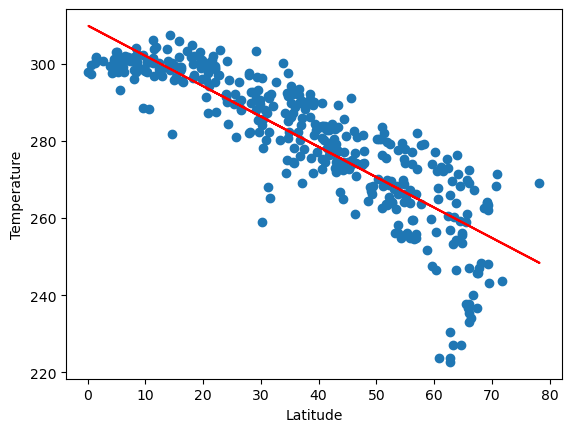

In [ ]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
s_x_values = southern_hemi_df['Lat']
s_y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
print(regress_values)
print(slope)

City_ID
1      291.589363
3      285.794393
4      301.309962
6      294.425536
8      287.710743
          ...    
585    299.058953
586    298.467334
589    293.281149
592    300.274644
593    293.227362
Name: Lat, Length: 197, dtype: float64
0.2934325446409874


In [ ]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.29x +301.72


The r-value is: 0.5095269070577069


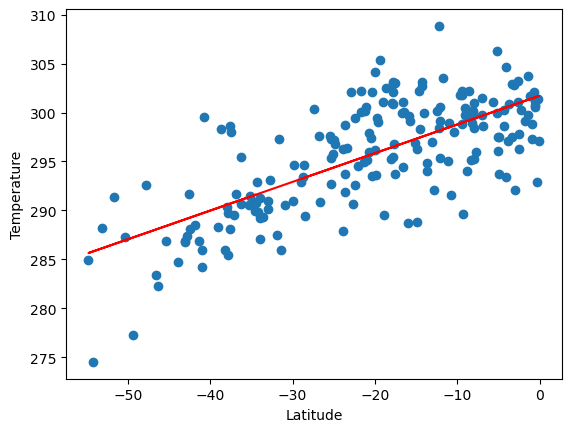

In [ ]:
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere, as latitude goes up temperature decreases. The temperature in the Northern hemisphere is highly correlated to the latitude in the Northern hemisphere at r=0.75. In the Northern hemisphere the slope of latitude temperature is -0.79x.

In the Southern hemisphere, as latitude increases temperature increases. The temperature in the Southern hemisphere is correlated to the latitude in the Southern hemisphere at r=0.51. In the Southern hemisphere the slope of latitude temperature is 0.29x.

### Humidity vs. Latitude Linear Regression Plot

City_ID
2      59.328123
4      85.368872
6      88.959093
9      67.383372
10     84.645015
         ...    
558    76.467650
559    63.066816
560    64.494904
561    81.464321
562    81.117370
Name: Lat, Length: 405, dtype: float64
0.4673367199034662
y = 0.47x +55.46
The r-value is: 0.16600335059794857


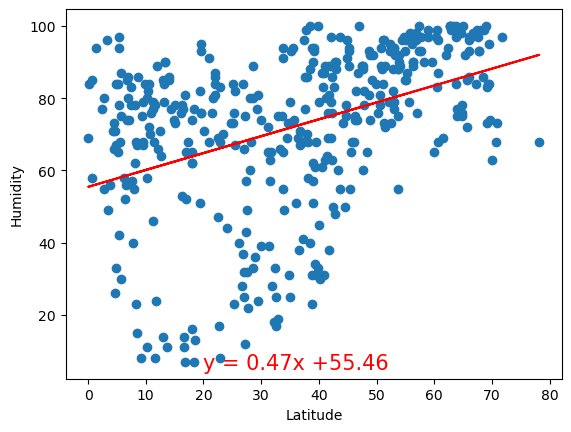

In [34]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      69.033009
1      61.786901
3      64.373486
5      67.286149
7      71.491174
         ...    
550    69.219172
553    68.594612
554    69.004791
555    64.345300
556    62.517312
Name: Lat, Length: 158, dtype: float64
0.3266013293204369
y = 0.33x +75.46
The r-value is: 0.05657489639248314


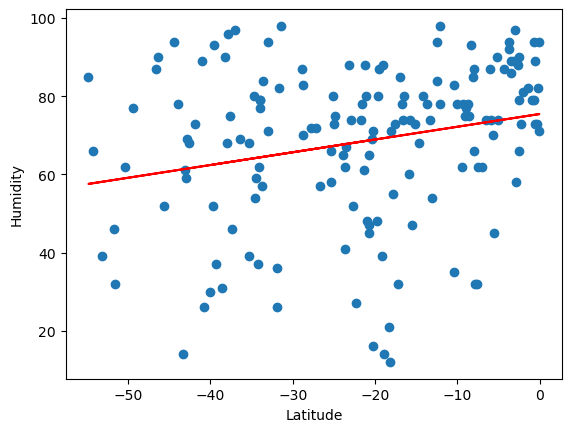

In [35]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
s_x_values = southern_hemi_df['Lat']
s_y_values = southern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
print(regress_values)
print(slope)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere, as latitude increases, humidity also increases. In the Northern hemisphere the latitude is somewhat correlated to the humidity at r=0.17. The slope of the latitude humidity in the Northern hemisphere is 0.47x.

In the Southern hemisphere, as latitude increases, humidity also increases. In the Southern hemisphere the humidity increases less than the Northern hemisphere in regards to latitude increase. In the Southern hemisphere the latitude is lacking causal relation at r=0.06. The slope of the latitude humidity in the Southern hemisphere is 0.33x.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
2      43.838242
4      69.685590
6      73.249147
9      51.833666
10     68.967108
         ...    
558    60.850476
559    47.549169
560    48.966650
561    65.810037
562    65.465663
Name: Lat, Length: 405, dtype: float64
0.46386587166500465
y = 0.46x +40.0
The r-value is: 0.05268446381678671


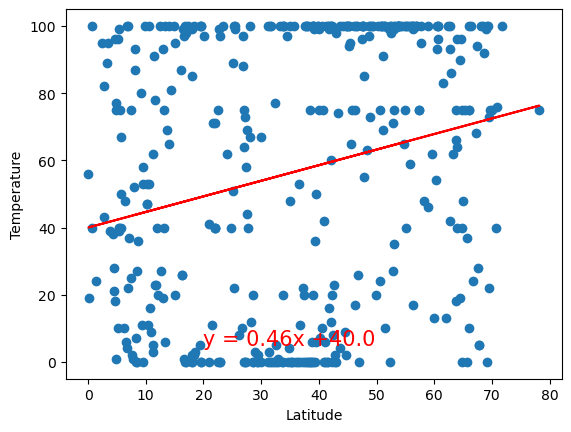

In [29]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      65.137259
1      49.043415
3      54.788305
5      61.257425
7      70.596924
         ...    
550    65.550732
553    64.163565
554    65.074585
555    54.725703
556    50.665683
Name: Lat, Length: 158, dtype: float64
0.7253922802805655
y = 0.73x +79.42
The r-value is: 0.08503269867058297


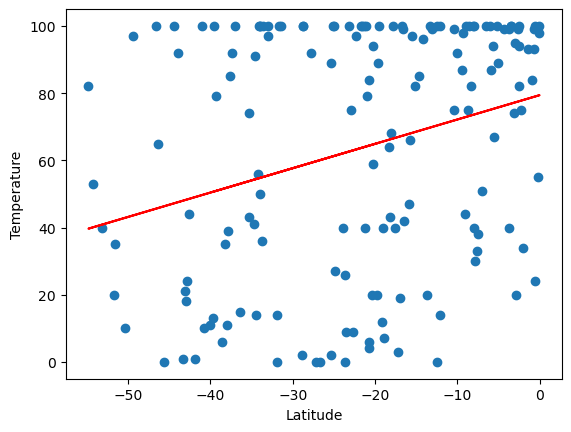

In [30]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
s_x_values = southern_hemi_df['Lat']
s_y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
print(regress_values)
print(slope)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere, the cloudiness increases as the latitude increases. The correlation of the cloudiness and latitude in the Northern hemisphere is only slight at r=0.05. The slope of cloudiness latitude in the Northern hemisphere is 0.46x. 

In the Southern hemisphere, the relationship between cloudiness latitude is similar to the Northern hemisphere. In the Southern hemisphere, the cloudiness increases as the latitude increases. The correlation between cloudiness and latitude in the Southern hemisphere is only slightly more in the Southern hemisphere at r = 0.09. The slope of the cloudiness latitude in the Souther hemisphere is 0.73x.

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
2      3.693138
4      3.127434
6      3.049441
9      3.518148
10     3.143159
         ...   
558    3.320803
559    3.611919
560    3.580896
561    3.212256
562    3.219793
Name: Lat, Length: 405, dtype: float64
-0.010152320005465712
y = -0.01x +3.78
The r-value is: 0.007156739585549116


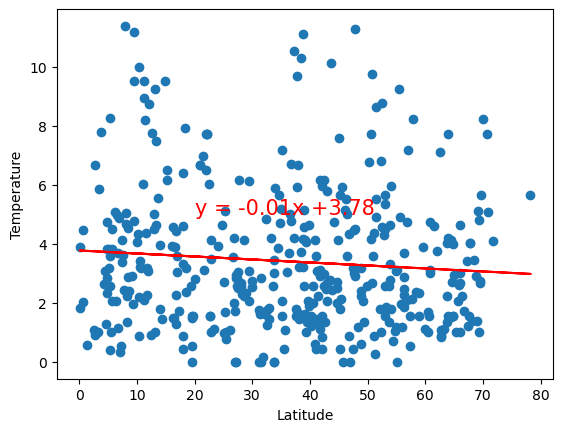

In [32]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      3.814710
1      5.306815
3      4.774190
5      4.174420
7      3.308530
         ...   
550    3.776376
553    3.904984
554    3.820521
555    4.779994
556    5.156410
Name: Lat, Length: 158, dtype: float64
-0.06725310910175888
y = -0.07x +2.49
The r-value is: 0.11811076898632518


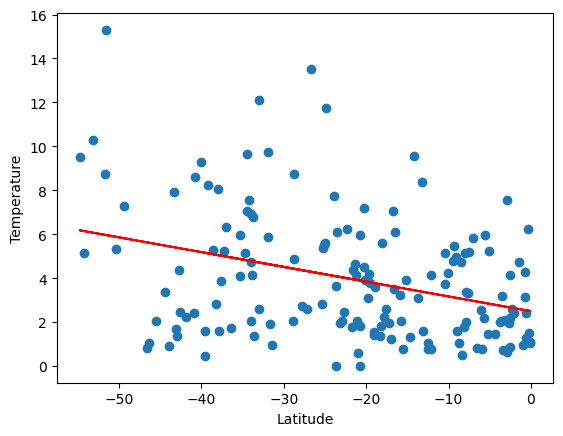

In [33]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
s_x_values = southern_hemi_df['Lat']
s_y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
print(regress_values)
print(slope)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere, the wind speed decreases as the latitude increases. The correlation of the wind speed and latitude in the Northern hemisphere is miniscule at r=0.01. The slope of wind speed latitude in the Northern hemisphere is -0.01x. 

In the Southern hemisphere, the relationship between cloudiness latitude is similar to the Northern hemisphere. In the Southern hemisphere, the wind speed decreases as the latitude increases. The correlation between cloudiness and latitude in the Southern hemisphere is slightly larger in the Southern hemisphere at r = 0.12. The slope of the cloudiness latitude in the Souther hemisphere is -0.07x.